In [76]:
import numpy as np
import pandas as pd

df = pd.read_csv('deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [77]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [78]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

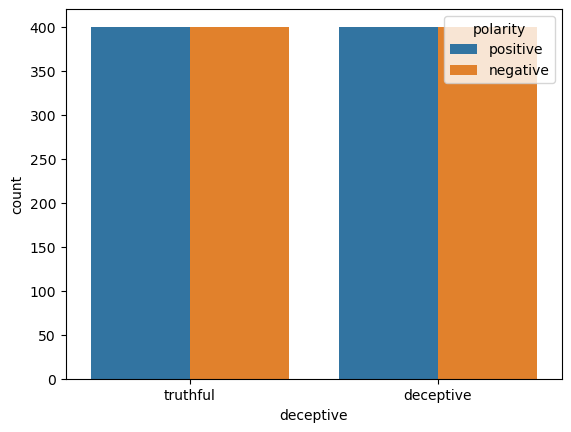

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'], hue='polarity', data = df)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

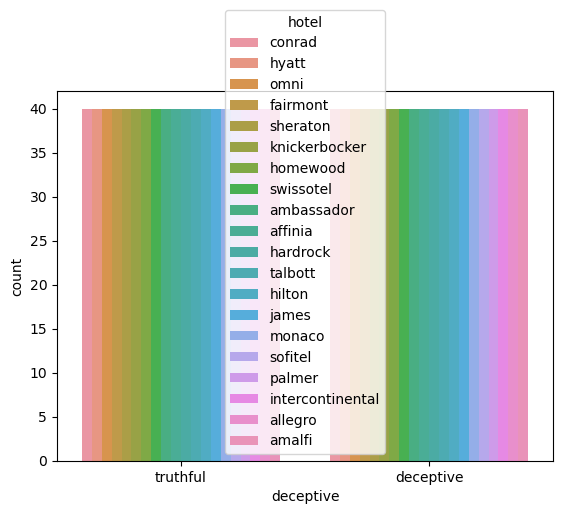

In [80]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)


In [81]:
df=df.drop(['hotel'],axis=1)


In [82]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [83]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string 
def text_cleaning(text):
    '''
        Make text lowercase, remove text in square brackets, remove link, remove special characters, 
        and remove words containing numbers.
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [84]:
df['text']=df['text'].apply(text_cleaning)


In [85]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [86]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

In [87]:
sentences=df['text'].values
y=df['deceptive'].values


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [89]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, random_state=1000)

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)
x_val = tokenizer.texts_to_sequences(sentences_val)


# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

x_train = pad_sequences(x_train, padding = 'post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)
x_val = pad_sequences(x_val,padding = 'post',maxlen=maxlen)


In [90]:
# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(x_train)
test_X_scaled = scaler.transform(x_test)

# Create sequences of input/output data for the LSTM network
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), :])
        y.append(data[(i+seq_length), 0])
    return np.array(X), np.array(y)

seq_length = 60
train_X_seq, train_y_seq = create_sequences(train_X_scaled, seq_length)
test_X_seq, test_y_seq = create_sequences(test_X_scaled, seq_length)

# Reshape the data for the LSTM network
train_X_seq = np.reshape(train_X_seq, (train_X_seq.shape[0], train_X_seq.shape[1], train_X_seq.shape[2]))
test_X_seq = np.reshape(test_X_seq, (test_X_seq.shape[0], test_X_seq.shape[1], test_X_seq.shape[2]))


In [91]:
# model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(250, activation='relu'))
# model.add(layers.Dense(250)
# model.add(layers.Dropout(rate = 0.4))
# model.add(layers.LSTM(128))

# model.add(Activation('relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dropout(rate = 0.5))
# model.add((LSTM(50,activation='relu', return_sequences=True )))
# model.add(LSTM(50, activation='relu', return_sequences=True ))
# model.add(LSTM(50, activation='relu', return_sequences=True))


# model.add(LSTM(50, activation='relu'))
# model.add(LSTM(75, activation='relu'))





# model.add(layers.Dense(250))

# model.add((LSTM(300)))

# model.add((LSTM(300)))

# model.add((LSTM(300)))
# model.add((LSTM(300)))

# model.add((LSTM(300)))

In [92]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense
from keras.layers import Dropout, Flatten, Bidirectional, Dense, Activation, TimeDistributed
import tensorflow as tf
# reg = tf.keras.regularizers.l1(0.001)

embedding_dim = 128

model = Sequential()
from tensorflow.keras.callbacks import EarlyStopping
# reg = tf.keras.regularizers.l2(0.001)
# early_stop = EarlyStopping(monitor='val_loss', patience=20)

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(LSTM(150, activation='relu', return_sequences=False))
model.add(Dropout(0.1))





model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val),
                    batch_size=32)

Epoch 1/30
30/30 [==============================] - 3s 68ms/step - loss: 0.6927 - accuracy: 0.5146 - val_loss: 0.6920 - val_accuracy: 0.5469
Epoch 2/30
30/30 [==============================] - 2s 63ms/step - loss: 0.6845 - accuracy: 0.6146 - val_loss: 0.6818 - val_accuracy: 0.5469
Epoch 3/30
30/30 [==============================] - 2s 63ms/step - loss: 0.9664 - accuracy: 0.6521 - val_loss: 0.6876 - val_accuracy: 0.5594
Epoch 4/30
30/30 [==============================] - 2s 63ms/step - loss: 0.6649 - accuracy: 0.6781 - val_loss: 0.6861 - val_accuracy: 0.5469
Epoch 5/30
30/30 [==============================] - 2s 63ms/step - loss: 843101.1875 - accuracy: 0.6615 - val_loss: 0.6731 - val_accuracy: 0.5531
Epoch 6/30
30/30 [==============================] - 2s 62ms/step - loss: 583.2009 - accuracy: 0.5729 - val_loss: 0.6769 - val_accuracy: 0.5469
Epoch 7/30
30/30 [==============================] - 2s 62ms/step - loss: 0.6546 - accuracy: 0.6135 - val_loss: 0.6772 - val_accuracy: 0.5469
Epoch 

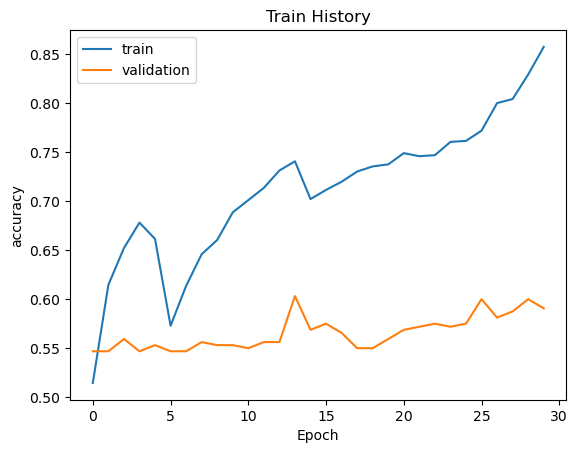

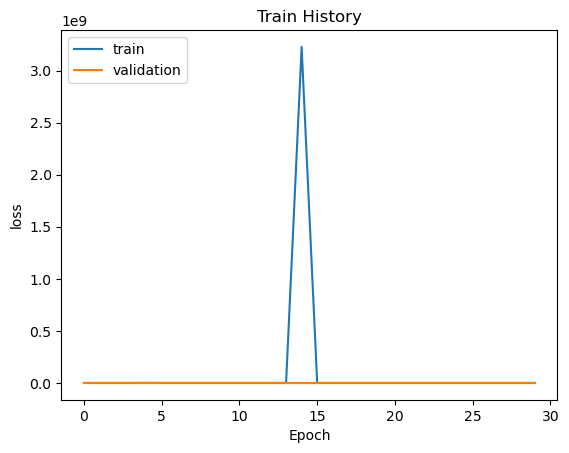

In [93]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [94]:
print('Training loss \t', history.history['loss'][-1]*100)
print('Training accuracy ',  history.history['accuracy'][-1]*100)
print('Validation loss ', history.history['val_loss'][-1]*100)
print('Validation accuracy ',  history.history['val_accuracy'][-1]*100)
# Training loss 	 14.32565450668335
# Training accuracy  94.87000107765198
# Validation loss  39.74485695362091
# Validation accuracy  85.68000197410583
# Final evaluation of the model using test dataset
# Students will be starting their code from here:
scores = model.evaluate(x_val, y_val, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)
# 782/782 [==============================] - 70s 89ms/step - loss: 0.3974 - accuracy: 0.8572
# Testing loss 	 39.741843938827515
# Testing accuracy  85.7159972190857
# predict=history.predict_classes(x_test)
# predict_classes=predict.reshape(len(x_test))

Training loss 	 39.143407344818115
Training accuracy  85.72916388511658
Validation loss  346.9982862472534
Validation accuracy  59.062498807907104
10/10 [==============================] - 0s 20ms/step - loss: 3.4700 - accuracy: 0.5906
Testing loss 	 346.9982862472534
Testing accuracy  59.062498807907104


In [95]:
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k)
scores = []

for train_index, test_index in kf.split(sentences):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=3)
    scores.append(model.evaluate(x_val, y_val))

print("Avg. cross-val accuracy:", np.mean(scores))


Epoch 1/3
30/30 [==============================] - 2s 53ms/step - loss: 0.3695 - accuracy: 0.8771
Epoch 2/3
30/30 [==============================] - 2s 54ms/step - loss: 0.3539 - accuracy: 0.8938
Epoch 3/3
10/10 [==============================] - 0s 22ms/step - loss: 4.5916 - accuracy: 0.6125
Epoch 1/3
30/30 [==============================] - 2s 57ms/step - loss: 0.3358 - accuracy: 0.9135
Epoch 2/3
30/30 [==============================] - 2s 55ms/step - loss: 0.3096 - accuracy: 0.9156
Epoch 3/3
10/10 [==============================] - 0s 20ms/step - loss: 5.0976 - accuracy: 0.6281
Epoch 1/3
30/30 [==============================] - 2s 54ms/step - loss: 0.2876 - accuracy: 0.9219
Epoch 2/3
30/30 [==============================] - 2s 55ms/step - loss: 0.2770 - accuracy: 0.9260
Epoch 3/3
10/10 [==============================] - 0s 22ms/step - loss: 10.9462 - accuracy: 0.6375
Epoch 1/3
30/30 [==============================] - 2s 56ms/step - loss: 0.2563 - accuracy: 0.9333
Epoch 2/3
30/30 [==

In [96]:
import pickle
pickle.dump(model, open('model22.pkl', 'wb'));
# cnn_model.save('model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-10 16:33:38         2361
metadata.json                                  2023-04-10 16:33:38           64
variables.h5                                   2023-04-10 16:33:38     13218080


In [97]:
new_text = "I love this hotel. The staff is very friendly. I don't think there is any places as good as this"
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 146ms/step
1.0


In [98]:
new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 21ms/step
1.0


In [99]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 20ms/step
1.0


In [100]:
new_text = "I had to do a little research on the Hilton brand because it's not one that I was familiar with. I wanted to know what this hotel chain's reputation was, so I did a little research online and found out that it's pretty well-known as a chain that people book into for their business trips and vacations. I also found out that this hotel chain is pretty well-reviewed by people who have stayed in their hotels."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)

1/1 [==============================] - 0s 20ms/step
1.0


In [101]:
y_pred = np.round(model.predict(x_val).ravel())


10/10 [==============================] - 0s 19ms/step


In [102]:
y_pred_label = []
for i in y_pred:
    if i == 1:
        y_pred_label.append("truthful")
    else:
        y_pred_label.append("deceptive")


In [103]:
y_val_label = []
for i in y_val:
    if i == 1:
        y_val_label.append("truthful")
    else:
        y_val_label.append("deceptive")



In [104]:
from sklearn.metrics import classification_report
print (classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.58      0.64       172
           1       0.60      0.72      0.65       148

    accuracy                           0.64       320
   macro avg       0.65      0.65      0.64       320
weighted avg       0.65      0.64      0.64       320



In [105]:
predict_val = pd.DataFrame({'val':sentences_val, 'Pred':y_pred_label, 'True_label':y_val_label}, columns=['Val','Pred','True_label'])

predict_val['result'] = np.where(predict_val['Pred']==predict_val['True_label'], 1, 0)



predict_val

,Val,Pred,True_label,result
0,NaN,truthful,deceptive,0
1,NaN,deceptive,deceptive,1
2,NaN,deceptive,truthful,0
3,NaN,deceptive,deceptive,1
4,NaN,truthful,truthful,1
...,...,...,...,...
315,NaN,truthful,deceptive,0
316,NaN,deceptive,truthful,0
317,NaN,truthful,truthful,1
318,NaN,deceptive,deceptive,1


In [106]:
from sklearn.metrics import accuracy_score
 
print(accuracy_score(y_val,y_pred))

0.64375


In [107]:
wrong = 0
right = 0
for i in predict_val['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)

The wrong guess is :  114
The right guess is:  206


# Test the model on test dataset

In [108]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.478125


In [109]:
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k)
scores = []

for train_index, test_index in kf.split(sentences):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=5)
    scores.append(model.evaluate(x_test, y_test))

print("Avg. cross-val accuracy:", np.mean(scores))


Epoch 1/5
30/30 [==============================] - 2s 53ms/step - loss: 0.2209 - accuracy: 0.9406
Epoch 2/5
30/30 [==============================] - 2s 54ms/step - loss: 0.2132 - accuracy: 0.9417
Epoch 3/5
30/30 [==============================] - 2s 56ms/step - loss: 0.2103 - accuracy: 0.9417
Epoch 4/5
30/30 [==============================] - 2s 56ms/step - loss: 0.2069 - accuracy: 0.9448
Epoch 5/5
10/10 [==============================] - 0s 21ms/step - loss: 114.7331 - accuracy: 0.6844
Epoch 1/5
30/30 [==============================] - 2s 53ms/step - loss: 0.1953 - accuracy: 0.9469
Epoch 2/5
30/30 [==============================] - 2s 53ms/step - loss: 0.1929 - accuracy: 0.9479
Epoch 3/5
30/30 [==============================] - 2s 56ms/step - loss: 0.1916 - accuracy: 0.9448
Epoch 4/5
30/30 [==============================] - 2s 55ms/step - loss: 0.1858 - accuracy: 0.9490
Epoch 5/5
10/10 [==============================] - 0s 20ms/step - loss: 173.9494 - accuracy: 0.6844
Epoch 1/5
30/30 

In [110]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.46      0.42      0.44       157
           1       0.49      0.53      0.51       163

    accuracy                           0.48       320
   macro avg       0.48      0.48      0.48       320
weighted avg       0.48      0.48      0.48       320



In [111]:
y_pred_label = []
for i in y_pred:
    if i == 1:
        y_pred_label.append("truthful")
    else:
        y_pred_label.append("deceptive")


# y_pred_label

In [112]:
y_test_label = []
for i in y_test:
    if i == 1:
        y_test_label.append("truthful")
    else:
        y_test_label.append("deceptive")


# y_test_label

In [113]:
predict_test = pd.DataFrame({'Test':sentences_test, 'Pred':y_pred_label, 'True_label':y_test_label}, columns=['Test','Pred','True_label'])
predict_test['result'] = np.where(predict_test['Pred']==predict_test['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_test.sort_values(by='result')

,Test,Pred,True_label,result
108,the fairmont chicago millennium park has to be...,truthful,deceptive,0
255,first room s heating system sounded like we ha...,deceptive,truthful,0
134,stayed valentines weekend got the floor with...,deceptive,truthful,0
135,when most people think hilton they think luxu...,truthful,deceptive,0
136,the location of this hotel was superb our roo...,truthful,deceptive,0
...,...,...,...,...
148,my significant other and i recently spent nig...,truthful,truthful,1
150,my wife and i travelled to chicago and really ...,truthful,truthful,1
153,i recently made a business trip to chicago in...,deceptive,deceptive,1
133,hello i recently stayed at the affinia hotel ...,deceptive,deceptive,1


In [114]:
wrong = 0
right = 0
for i in predict_test['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)
    


        

The wrong guess is :  167
The right guess is:  153


In [115]:
pkl = open('model22.pkl', 'rb');
clf = pickle.load(pkl);

new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")



Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-10 16:33:38         2361
metadata.json                                  2023-04-10 16:33:38           64
variables.h5                                   2023-04-10 16:33:38     13218080
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
1/1 [===========================

In [116]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.51075387]]
0.51075387
truthful


In [117]:
new_text = "I booked flights through expedia.co.uk I had to cancel due to a medical emergency. One airline (outbound) refunded tax directly. The other airline (return) said I was eligible for a tax refund, but that I had to go through expedia as the agent. Expedia claims that the tax is non-refundable, as the flights are non-refundable. Airlines do not pay tax for seats that have not been used. So who is profiting from the un-used tax? My guess is Expedia since the airline was happy to refund."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 18ms/step
[[0.53590405]]
0.53590405
truthful


In [118]:
new_text = "I booked a hotel stay with 15 days parking package and upon checking in at LGW hotel was told that they had no record of the number of days free parking. Expedia didn’t help at all, and even though my confirmation stated ‘free parking’ it didn’t say ‘15 days free parking’ and so Expedia say that my parking is all due to be paid myself for 15 days, despite me booking the specific package for £172. I won’t be using these muppets ever again, I’ve had to fork out parking to the hotel also. Not a happy Chappy. Avoid Expedia park and stay packages like the plague !!"
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.36238793]]
0.36238793
deceptive


In [119]:
new_text = "This food is amazing!!!!"
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.615656]]
0.615656
truthful


In [120]:
new_text = "This company is awful, tickets are put up only for them to take your money as a pending transaction and tell you it is because they no longer have seats available or the prices have changed... only for you to see two weeks later that the same flight is being advertised for the same price. I now have to wait for my money to come back into my account before I can book my flight elsewhere."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.6630119]]
0.6630119
truthful


In [121]:
new_text = "I use expedia a few times a year to book trips. This year in Prague one of our booked trips was cancelled by the provider, we turned up and they sent us away saying it was cancelled. After going backwards and forwards with expedia they will not issue me with a refund as the provider of the show will not respond to them. Viator reviews say that this show has not existed for several years, why is it still being sold!! Its an absolute con and expedia are helping them, I am totally disgusted and will not book with them again."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.7447765]]
0.7447765
truthful


In [122]:
new_text = "I booked with expedia long time ago. The experience was horrible. Arrived to the Prague airport early in the morning just to hear that there is no space in the plane, after some very worrying moments they said there is a space. Got in to the plane then the sit number i have been given was given to someone else so they told me that i can sit to somewhere else, guess what next.. the owner of that seat appeared also.. on and on… i was happy as i was in the plane but the experience was good enough not to book with this company ever again"
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 18ms/step
[[0.5947658]]
0.5947658
truthful


In [123]:
new_text = "Kutchenhaus, Hythe, Kent. 5 Stars for this kitchen shop, specialising in high quality German craftsmanship. We were hugely impressed with the courteous and well-informed advice we were given by Ben and his expertise in describing the different possibilities we could choose from my wife and I recommend this shop 100%."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.5495965]]
0.5495965
truthful


In [124]:
new_text = "Great staff at Quart Pot. Bar staff very friendly - Lisa,Scarlett and Grace. Good food too"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 18ms/step
[[0.7698261]]
0.7698261
truthful


In [125]:
new_text = "Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.8593764]]
0.8593764
truthful


In [126]:
new_text = "A little pricey for what it is."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 18ms/step
[[0.66998315]]
0.66998315
truthful


In [127]:
new_text = "Takes out the mystery of when my meat is finished cooking"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.59473944]]
0.59473944
truthful


In [128]:
new_text = "I like the clock although it has the design flaw which is that it is a little hard to read"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.91299725]]
0.91299725
truthful


In [129]:
new_text = "Great product. Arrived on time and matched my shower curtain perfectly."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.47410846]]
0.47410846
deceptive


In [130]:
new_text = "Wonderful!!!!! Great size, throw them in the dishwasher - these area GREAT!!!!!"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.6622174]]
0.6622174
truthful


In [131]:
new_text = "SOOOOOOO cute. I love them. Adorable. Well made and totally worth the price!!"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.7994719]]
0.7994719
truthful


In [132]:
new_text = "Bought as a gift for my daughter, seems to be a great buy."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.6153155]]
0.6153155
truthful


In [133]:
new_text = "Doesn't get any better than this.  Outstanding quality.  Just the right size."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 18ms/step
[[0.73578936]]
0.73578936
truthful


# Test with unseen dataset from differenr distribution

In [134]:
new_text = "Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.8593764]]
0.8593764
truthful


In [135]:
new_text = "What can you say--- cheap and it works as intended."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.60814226]]
0.60814226
truthful


In [136]:
new_text = "Really ruff under your feet, it feels very sturdy. I will keep my feet in the chair"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 19ms/step
[[0.6620197]]
0.6620197
truthful


In [137]:
new_text = "Order to place special photos on the wall.  We've had it for a couple of weeks and"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.62002844]]
0.62002844
truthful


In [138]:
new_text = "excellent product if you are a side sleeper this is perfect"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.64615005]]
0.64615005
truthful


In [139]:
new_text = "Great product. Arrived on time and matched my shower curtain perfectly."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 19ms/step
[[0.47410846]]
0.47410846
deceptive


In [140]:
new_text = "Perfection. Beyond easy to use, minimal effort, fast and perfect froth."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.5816199]]
0.5816199
truthful


In [141]:
df_test = pd.read_csv('../FakeReviewDataset.csv')
df_test

,category,rating,label,text_
0,Home_and_Kitchen_5,5,deceptive,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,deceptive,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,deceptive,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,deceptive,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,deceptive,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4,truthful,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5,deceptive,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2,truthful,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1,deceptive,I liked nothing about this dress. The only rea...


In [142]:
x = df_test['text_']
y_val = df_test['label']

In [143]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, padding = 'post', maxlen=maxlen)


In [144]:
y_pred = np.round(model.predict(x).ravel())
y_pred

1264/1264 [==============================] - 25s 19ms/step


array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [145]:
y_pred_label_test = []
for i in y_pred:
    if i == 1:
        y_pred_label_test.append("truthful")
    else:
        y_pred_label_test.append("deceptive")

        
y_label_test = []
for i in y_val:
    if i == 1:
        y_label_test.append("truthful")
    else:
        y_label_test.append("deceptive")


In [146]:
predict_val = pd.DataFrame({'dataTest':df_test['text_'], 'Pred':y_pred_label_test, 'True_label':y_label_test}, columns=['dataTest','Pred','True_label'])
predict_val['result'] = np.where(predict_val['Pred']==predict_val['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_val.sort_values(by='result')

,dataTest,Pred,True_label,result
0,"Love this! Well made, sturdy, and very comfor...",truthful,deceptive,0
25743,"Well, I just finished number eight. So glad to...",truthful,deceptive,0
25744,Just a nice cozy mystery. Nothing earthshatter...,truthful,deceptive,0
25745,This was an incredibly sweet story a little to...,truthful,deceptive,0
25746,An amazing story. You are carried right along ...,truthful,deceptive,0
...,...,...,...,...
14691,"The Earth, Moon, and Mars are under attack fro...",deceptive,deceptive,1
31524,This book is a great read. The characters are ...,deceptive,deceptive,1
31525,"On average, this reader consumes two or three ...",deceptive,deceptive,1
23440,"My pup loves these, possibly because they are ...",deceptive,deceptive,1


In [147]:
wrong = 0
right = 0
for i in predict_val['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)
    

The wrong guess is :  36214
The right guess is:  4218
